## How to execute in colab
Upload image and secret key file  in the colab environment and then execute as per your required sections.


## How to encode my image
look for "run here to encode"

## How to decode my image
look for "run here to decode"


### Change paths aur secret text in the following 

In [ ]:
input_image = input("Enter the path to input image")
output_image = input("Enter the path to output image")
delimiter = "====="
data_to_hide=input("Enter the secret data : \n")
secret_data = data_to_hide + delimiter


Enter the path to input image/content/Cover_2.png
Enter the path to output image/content/Cover_4.png
Enter the secret data : 
janhavi


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Imports

In [ ]:
import cv2
import numpy as np

## Load Key 

In [ ]:
def get_key():
    myfile = open('/content/secret_key.txt', 'rt') 
    key1 = myfile.read()        
    myfile.close()                   
    return key1
get_key()

'hello\n'

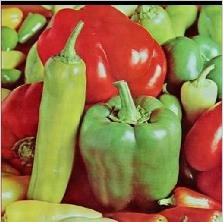

In [ ]:
from IPython.display import Image
Image('/content/Cover_2.png')


## Convert To Binary

In [ ]:
def to_bin(data):
    """Convert `data` to binary format as string"""
    if isinstance(data, str):
        return ''.join([ format(ord(i), "08b") for i in data ])
    elif isinstance(data, bytes) or isinstance(data, np.ndarray):
        return [ format(i, "08b") for i in data ]
    elif isinstance(data, int) or isinstance(data, np.uint8):
        return format(data, "08b")
    else:
        raise TypeError("Type not supported.")

Common Operations

In [ ]:
binary_secret_data = to_bin(secret_data)
n = len(binary_secret_data)

# Encode The Data in Image

In [ ]:
def encode(key, image_name, secret_data):
    
    image = cv2.imread(image_name)
    
    n_bytes = image.shape[0] * image.shape[1] * 3 // 8
    print("[*] Maximum bytes to encode:", n_bytes)
    if len(secret_data) > n_bytes:
        raise ValueError("[!] Insufficient bytes, need bigger image or less data.")
    print("[*] Encoding data...")
    
    
   
    data_index = 0
    
    binary_secret_data = to_bin(secret_data)
    binary_key = to_bin(key)
    
    enc_data = ([])
    for i in range(0, len(binary_secret_data)): 
         enc_data.append(int(binary_secret_data[i]) ^ int(binary_key[i%8]))

    

    data_len = len(enc_data)
    for row in image:
        for pixel in row:
            r, g, b = to_bin(pixel)
            
            if ((data_index < data_len) and (( int(r[-2]) ^ int(binary_key[(data_index)%8])) == 1)):
                pixel[0] = int(r[:-1] + str(enc_data[data_index]), 2)
                data_index += 1
            if ((data_index < data_len) and (( int(g[-2]) ^ int(binary_key[(data_index)%8])) == 1)):
                
                pixel[1] = int(g[:-1] + str(enc_data[data_index]), 2)
                data_index += 1
            if ((data_index < data_len) and (( int(b[-2]) ^ int(binary_key[(data_index)%8])) == 1)):
                
                pixel[2] = int(b[:-1] + str(enc_data[data_index]), 2)
                data_index += 1
            
            if data_index >= data_len:
                break
    return image


## Run here to encode

In [ ]:
encoded_image = encode(data_to_hide, image_name=input_image, secret_data=secret_data)
print("Data encoded and Image generated")

cv2.imwrite(output_image, encoded_image)
 

[*] Maximum bytes to encode: 18564
[*] Encoding data...
Data encoded and Image generated


True

# Decode The Data from Image

In [ ]:
def decode(key, image_name):
    print("[+] Decoding...")
    
    image = cv2.imread(image_name)
    binary_data = ""
    data_index = 0
    binary_key = to_bin(key)
    for row in image:
        for pixel in row:
            r, g, b = to_bin(pixel)
            if ((( int(r[-2]) ^ int(binary_key[(data_index)%8])) == 1)):
                
                binary_data += r[-1]
                data_index += 1
            if ((( int(g[-2]) ^ int(binary_key[(data_index)%8]) ) == 1)):
                
                binary_data += g[-1]
                data_index += 1
            if ((( int(b[-2]) ^ int(binary_key[(data_index)%8]) ) == 1)):
                
                binary_data += b[-1]
                data_index += 1

            if data_index > n:
                break

    all_bytes = [ binary_data[i: i+8] for i in range(0, len(binary_data), 8) ]
    
    

    dec_data = []
    
    for i in range(0, len(all_bytes)-1):
        dec_str = ""
        for j in range(0,8): 
            dec_str += str(int(binary_data[i*8 + j]) ^ int(binary_key[j]))
        dec_data.append(dec_str)

    

    decoded_data = ""
    for byte in dec_data:
        decoded_data += chr(int(byte, 2))
        if decoded_data[-5:] == '=====' :
            break
    
    return decoded_data[:-5]


## Run here to decode image

In [ ]:
key = get_key()
decoded_data = decode(data_to_hide, output_image)
print("[+] Decoded data:", decoded_data)

[+] Decoding...
[+] Decoded data: janhavi


## Calculate PSNR

In [ ]:
def calculate_PSNR(input_path,output_path):
    input_image = cv2.imread(input_path)
    output_image = cv2.imread( output_path)

    psnr = cv2.PSNR(input_image, output_image)
    print(psnr)
    

In [ ]:
calculate_PSNR(input_image, output_image)

82.44496763592119
